In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df_fifa = pd.read_csv('fifa.csv')
df_fifa.head()

,country,confederation,population_share,tv_audience_share,gdp_weighted_share
0,united states,concacaf,4.5,4.3,11.3
1,japan,afc,1.9,4.9,9.1
2,china,afc,19.5,14.8,7.3
3,germany,uefa,1.2,2.9,6.3
4,brazil,conmebol,2.8,7.1,5.4


In [ ]:
df_fifa.rename(index=str, columns={
    'population_share' : 'population',
    'tv_audience_share' : 'tv',
    'gdp_weighted_share' : 'gdp'
}, inplace=True)

In [ ]:
x = df_fifa.drop(['country','confederation'], axis=1)
print(x)

     population    tv   gdp
0           4.5   4.3  11.3
1           1.9   4.9   9.1
2          19.5  14.8   7.3
3           1.2   2.9   6.3
4           2.8   7.1   5.4
..          ...   ...   ...
186         0.0   0.0   0.0
187         0.1   0.0   0.0
188         0.0   0.0   0.0
189         0.0   0.0   0.0
190         0.0   0.0   0.0

[191 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(3, 1000, 'Possible elbow point')

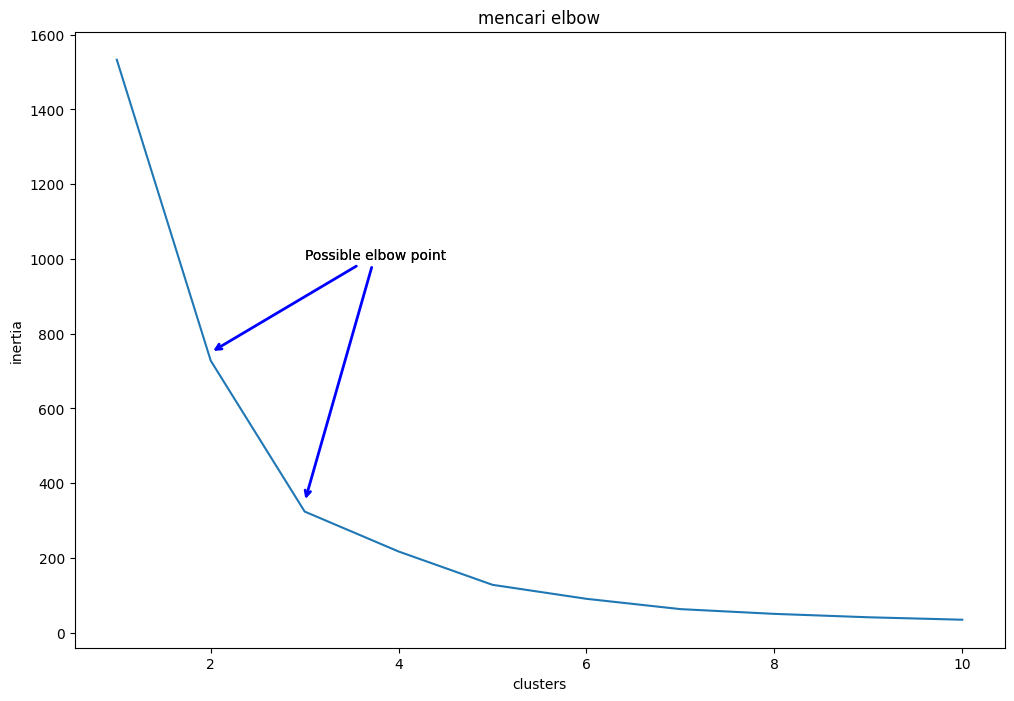

In [ ]:
 #menentukan jumlah klaster dengan elbow
clusters=[]
for i in range(1,11):
  km=KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(2, 750), xytext=(3, 1000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(3, 350), xytext=(3, 1000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

In [ ]:
n_clust = 4
Kmean = KMeans(n_clusters=n_clust).fit(x)
x['Labels'] = Kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


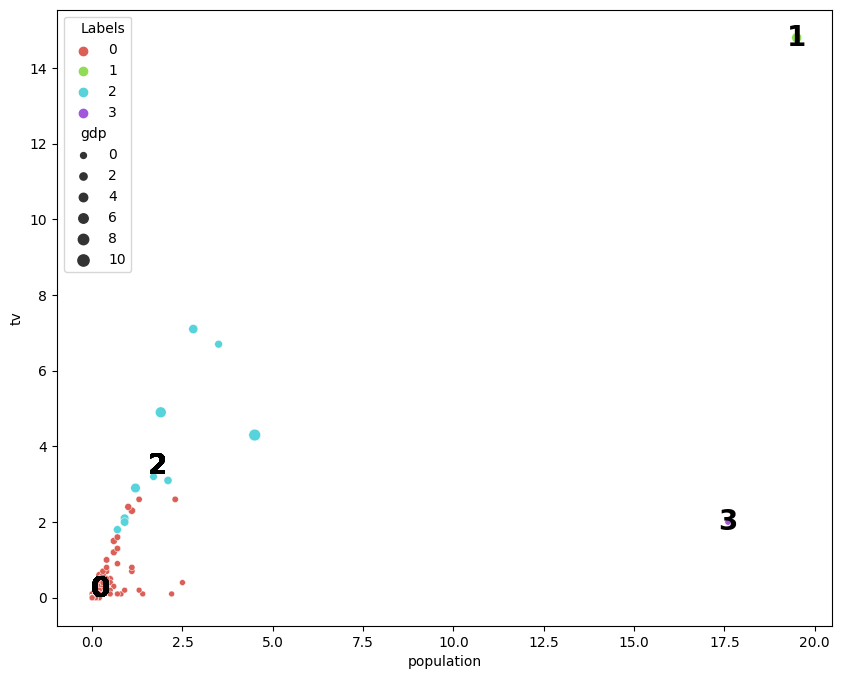

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='population', y='tv', size='gdp', hue='Labels', markers=True, data=x, palette=sns.color_palette('hls', n_clust))

for label in x['Labels']:
    mean_population = x[x['Labels'] == label]['population'].mean()
    mean_tv = x[x['Labels'] == label]['tv'].mean()
    mean_gdp = x[x['Labels'] == label]['gdp'].mean()

    plt.annotate(label,
                 (mean_population, mean_tv),
                 xytext=(mean_population, mean_tv),  # Use the same values for xytext
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

In [ ]:
print(x)

     population    tv   gdp  Labels
0           4.5   4.3  11.3       2
1           1.9   4.9   9.1       2
2          19.5  14.8   7.3       1
3           1.2   2.9   6.3       2
4           2.8   7.1   5.4       2
..          ...   ...   ...     ...
186         0.0   0.0   0.0       0
187         0.1   0.0   0.0       0
188         0.0   0.0   0.0       0
189         0.0   0.0   0.0       0
190         0.0   0.0   0.0       0

[191 rows x 4 columns]


# **Hierarchical Clustering:**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [ ]:
features = df_fifa[['population_share', 'tv_audience_share', 'gdp_weighted_share']]

hierarchical = AgglomerativeClustering(n_clusters=3)
df_fifa["hierarchical_cluster"] = hierarchical.fit_predict(features)

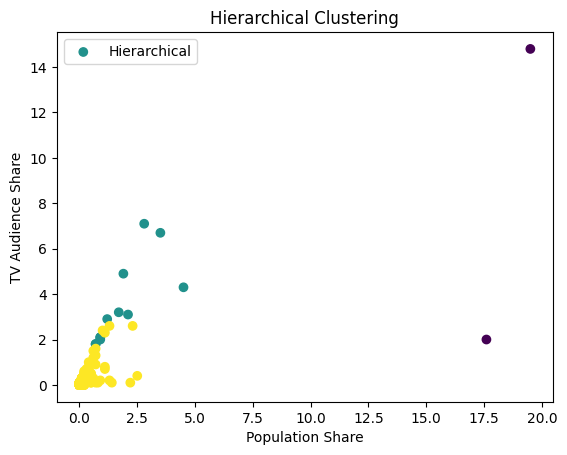

In [ ]:
plt.scatter(df_fifa['population_share'], df_fifa['tv_audience_share'], c=df_fifa['hierarchical_cluster'], cmap='viridis', label='Hierarchical')
plt.title('Hierarchical Clustering')
plt.xlabel('Population Share')
plt.ylabel('TV Audience Share')
plt.legend()
plt.show()